# Reinforcement Learning Project

This Q-learning algorithm learns how to play the "Frozen lake" game from the openAI's Gym library.
This code is inspired and been influenced by DeepLizzard whos blog post can be found here: http://deeplizard.com/learn/video/QK_PP_2KgGE

# Imports

In [207]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
import time 
from IPython.display import clear_output

# Build the enviroment
We use the openAI "gym" to load an pre build game and simple API that allows us to interract with the enviroment

In [208]:
env = gym.make("FrozenLake-v0")

action_space_size = env.action_space.n
state_space_size = env.observation_space.n


Next we build a Q-table with height of the number of all possible states in the game and width of the number of actions we can perform.

In [209]:
Q_table = np.zeros((state_space_size, action_space_size))

print(Q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


# Hyper parameters

Here we define all the variables that can be changed to influence the learning process

In [210]:
num_of_episodes = 20000
max_steps_per_episode = 200

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1

# The training process

The training process is based on two main loops. In the first loop we go through all episodes and in the inner one we go trough indvidual episodes including taking the steps and getting rewards. After every step we get an reward from the enviroment and we update the Q-table.

We have an exploration_rate that definis how likely it is for our agent to take action based on exploration or explotation. We start with exploration_rate being number of "1" and after each episode we update the number with logarithm function so that it goes down to zero pretty quickly and the agent only exploits the enviroment.

In [211]:

rewards_of_all_episodes = []

for episode in range(num_of_episodes):
    state = env.reset()
        
    done = False
    rewards_current_episode = 0
    
    for step in range(max_steps_per_episode):
        
        random_number = random.uniform(0,1)
        
        if random_number > exploration_rate:
            action = np.argmax(Q_table[state,:]) 
            
        else:
            action = env.action_space.sample() 
        
        new_state, reward, done, info = env.step(action)

        Q_table[state, action] = Q_table[state, action] * (1 - learning_rate) \
        + learning_rate * (reward + discount_rate * np.max(Q_table[new_state,:]))

        state = new_state
        rewards_current_episode = rewards_current_episode + reward
        
        if done == True:
            break
                
    exploration_rate = 1 - np.log(episode + 1) / np.log(num_of_episodes + 1)
        
    rewards_of_all_episodes.append(rewards_current_episode)   

# Visualize the training process

We print out and plot the avarage reward per thousand episodes to see how our agent evolves over time.

Average reward per thousand episodes 

1000 : 0.064
2000 : 0.201
3000 : 0.209
4000 : 0.262
5000 : 0.285
6000 : 0.339
7000 : 0.35
8000 : 0.394
9000 : 0.461
10000 : 0.413
11000 : 0.503
12000 : 0.486
13000 : 0.538
14000 : 0.548
15000 : 0.584
16000 : 0.593
17000 : 0.643
18000 : 0.655
19000 : 0.693
20000 : 0.709


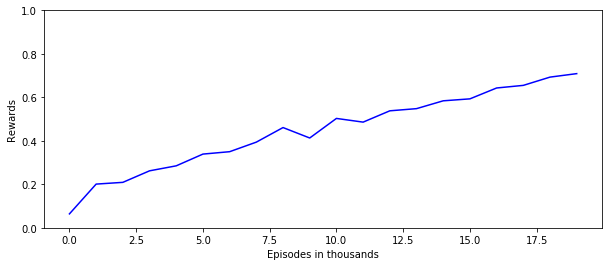



Q Table:
[[0.56439811 0.46073345 0.47016473 0.46372938]
 [0.28862611 0.36589873 0.30948563 0.46025503]
 [0.41634195 0.41430137 0.38596426 0.42546981]
 [0.35614333 0.30756794 0.30825041 0.41845083]
 [0.58156619 0.29869529 0.40587493 0.40219385]
 [0.         0.         0.         0.        ]
 [0.19540828 0.13798554 0.4098025  0.17648021]
 [0.         0.         0.         0.        ]
 [0.30634549 0.42659071 0.38563445 0.60602169]
 [0.36982488 0.67271341 0.45895325 0.3771537 ]
 [0.63776981 0.41567414 0.36498536 0.38031685]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.36775532 0.55768488 0.83308946 0.56087892]
 [0.74813183 0.92564608 0.73795584 0.74991591]
 [0.         0.         0.         0.        ]]


In [212]:
rewards_per_thousand_episodes = np.split(np.array(rewards_of_all_episodes),
                               num_of_episodes/1000)

reward_value_list = []

count = 1000
print("Average reward per thousand episodes \n")
for i in rewards_per_thousand_episodes:
    print(count, ":", str(sum(i) / 1000))
    
    current_reward_value = sum(i) / 1000
    reward_value_list.append(current_reward_value)
    count = count + 1000
    
    
plt.figure(figsize=(10,4))
plt.ylim(0,1)

plt.plot(reward_value_list, 'b', label='Training loss')
plt.xlabel('Episodes in thousands')
plt.ylabel('Rewards')
#plt.legend()
plt.show()

    

print("\n")
print("Q Table:")
print(Q_table)
    

# Lets see our agent playing the game!

In [213]:

for episode in range(3):
    state = env.reset()
    done = False
    print("Episode", episode+1, "\n")
    time.sleep(1)

    for step in range(40):
        clear_output(wait=True)
        env.render()
        time.sleep(0.4)
        
        action = np.argmax(Q_table[state,:])
        new_state, reward, done, info = env.step(action)
        
        if done:
            clear_output(wait=True)
            env.render()
            if reward == 1:
                print("You won the game!")
                time.sleep(2)
                
            else:
                print("You are dead!")
                time.sleep(2)
            
            clear_output(wait=True)
            break
        
        state = new_state
        
        
        
env.close()

  (Down)
SFFF
FHFH
FFFH
HFFG
You won the game!
